## Import TensorFlow and other libraries

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense
import time

59500.0

## Load the dataset and exploration

In [6]:
(x_train, _), (x_test, _) =  mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


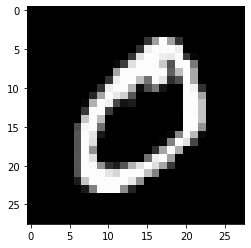

In [22]:
# Plot image data from x_train
plt.imshow(x_train[1], cmap = "gray")
plt.show()


## Fully Connected Autoencoder 

Check for optimal latent size for `Adam` optimizer

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0538 - val_loss: 0.0458
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0446 - val_loss: 0.0431
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0424 - val_loss: 0.0415
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0410 - val_loss: 0.0404
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0401 - val_loss: 0.0397
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0395 - val_loss: 0.0394
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0389 - val_loss: 0.0387
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0385 - val_loss: 0.0382
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0381 - val_loss: 0.0380
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.037

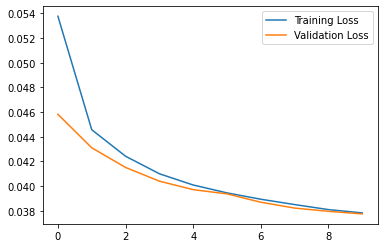

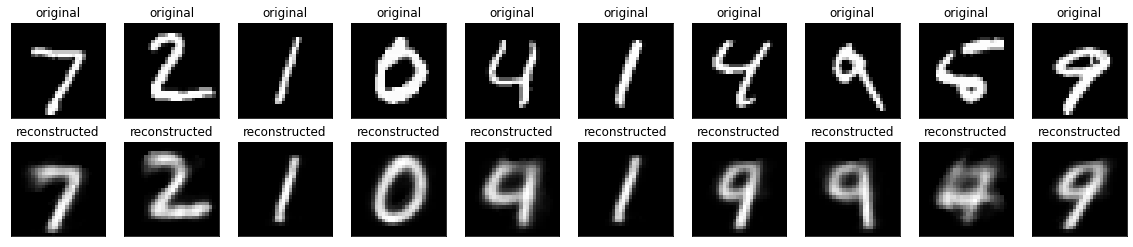

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0457 - val_loss: 0.0357
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0343 - val_loss: 0.0329
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0321 - val_loss: 0.0314
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0307 - val_loss: 0.0302
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0298 - val_loss: 0.0297
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0292 - val_loss: 0.0291
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0288 - val_loss: 0.0289
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0284 - val_loss: 0.0287
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0281 - val_loss: 0.0285
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.027

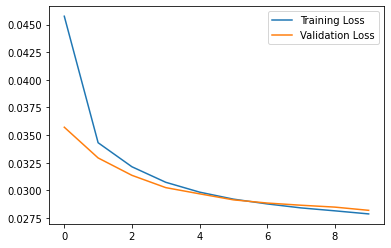

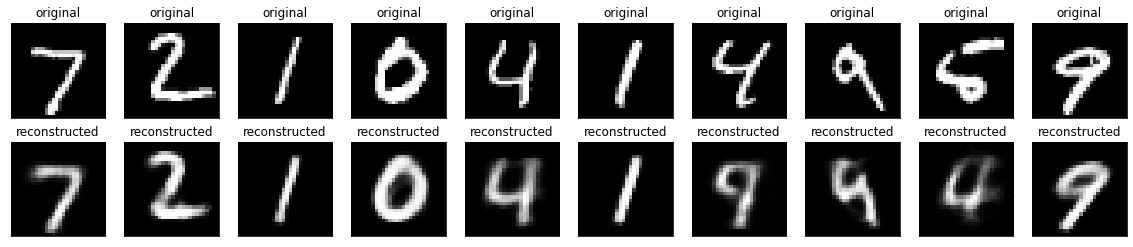

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0424 - val_loss: 0.0301
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0285 - val_loss: 0.0269
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0263 - val_loss: 0.0250
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0243 - val_loss: 0.0231
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0229 - val_loss: 0.0222
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0221 - val_loss: 0.0216
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0216 - val_loss: 0.0213
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0212 - val_loss: 0.0208
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0208 - val_loss: 0.0206
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.020

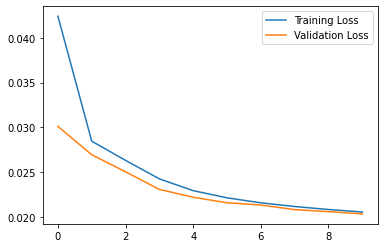

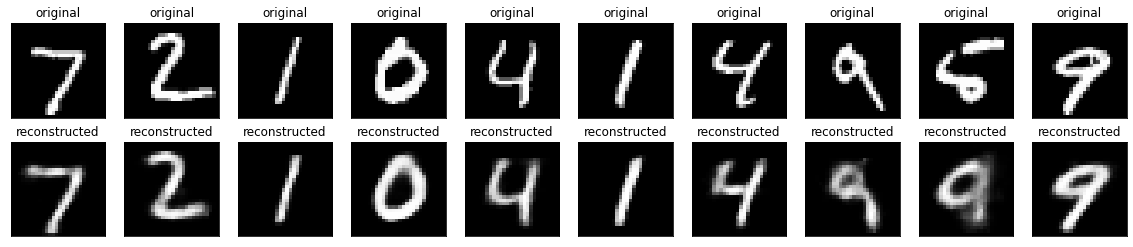

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0428 - val_loss: 0.0281
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0255 - val_loss: 0.0232
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0224 - val_loss: 0.0210
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0209 - val_loss: 0.0204
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0199 - val_loss: 0.0193
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0191 - val_loss: 0.0182
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0184 - val_loss: 0.0178
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0176 - val_loss: 0.0172
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0169 - val_loss: 0.0163
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.016

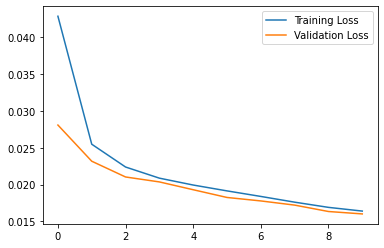

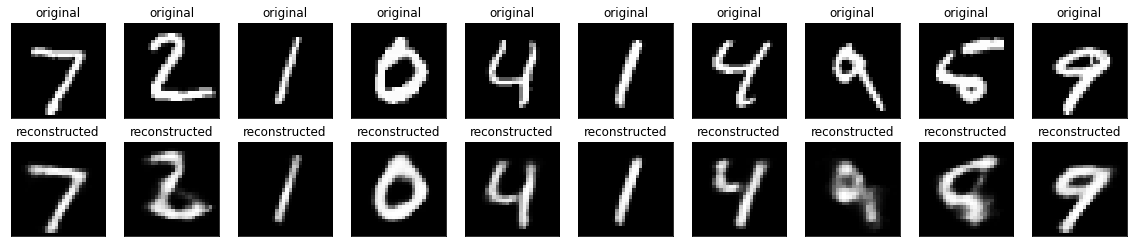

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0357 - val_loss: 0.0225
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0206 - val_loss: 0.0183
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0176 - val_loss: 0.0164
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0160 - val_loss: 0.0149
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0147 - val_loss: 0.0144
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0137 - val_loss: 0.0132
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0130 - val_loss: 0.0126
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0124 - val_loss: 0.0118
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0118 - val_loss: 0.0116
Epoch 10/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.011

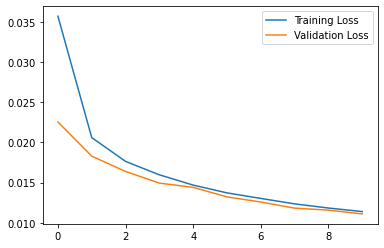

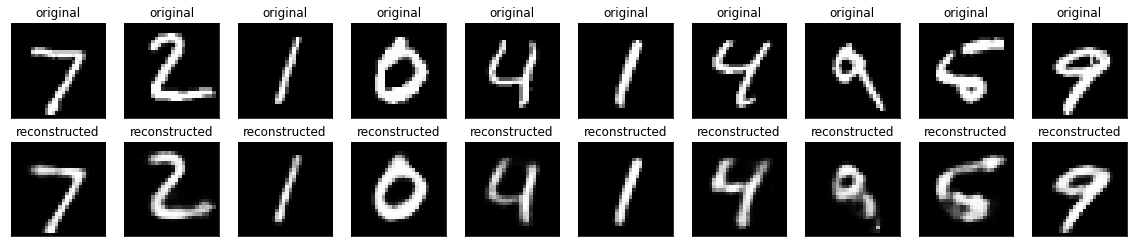

In [23]:
latent_dims = [2,4, 8,16,32]

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(latent_dim, activation='relu')
    ])
    self.decoder = tf.keras.Sequential([   
      layers.Dense(32, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),                               
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

for latent_dim in latent_dims:

    autoencoder = Autoencoder(latent_dim) 
    autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
    start_time = time.time()
    history= autoencoder.fit(x_train, x_train,epochs=10,shuffle=True, validation_data=(x_test, x_test))
    end_time = time.time()  
    print ("Training time = " +str(end_time - start_time) )
    encoded_imgs = autoencoder.encoder(x_test).numpy()
    decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
    print(f'When the value of the latent_dim is:{latent_dim}\n')
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.legend()
    print(f'When the value of the latent_dim is:{latent_dim}\n')
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
         # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i])
        plt.title("original")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

  # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i])
        plt.title("reconstructed")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()


## Fully Connected Autoencoder 

Check for optimal optimizers

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2316 - val_loss: 0.2316
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2314 - val_loss: 0.2314
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2312 - val_loss: 0.2313
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2311 - val_loss: 0.2311
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2309 - val_loss: 0.2309
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2307 - val_loss: 0.2307
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2305 - val_loss: 0.2305
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2304 - val_loss: 0.2304
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2302 - val_loss: 0.2302
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.230

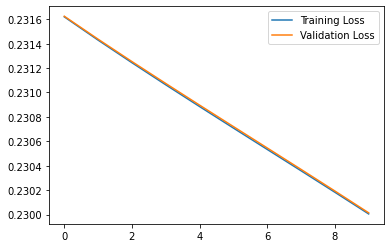

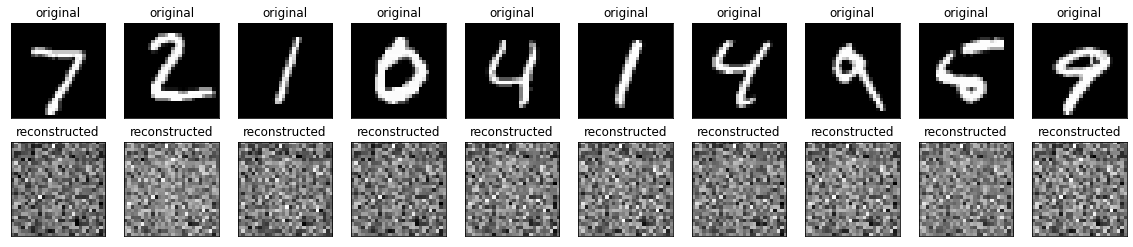

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2312 - val_loss: 0.2311
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2308 - val_loss: 0.2307
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2304 - val_loss: 0.2303
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2300 - val_loss: 0.2299
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2296 - val_loss: 0.2295
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2292 - val_loss: 0.2291
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2288 - val_loss: 0.2287
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2284 - val_loss: 0.2283
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2280 - val_loss: 0.2278
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.227

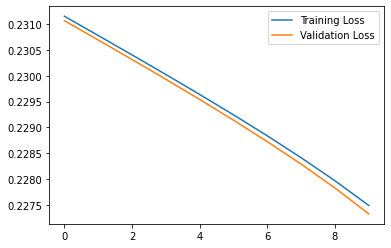

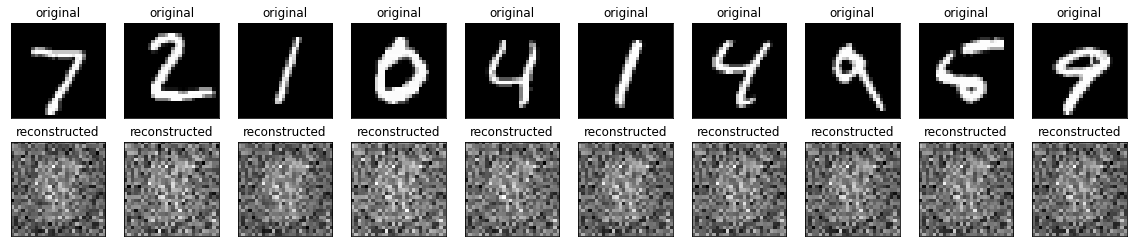

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2312 - val_loss: 0.2310
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2307 - val_loss: 0.2305
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2302 - val_loss: 0.2300
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2296 - val_loss: 0.2295
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2290 - val_loss: 0.2288
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2283 - val_loss: 0.2280
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2274 - val_loss: 0.2270
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2262 - val_loss: 0.2254
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2241 - val_loss: 0.2226
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.220

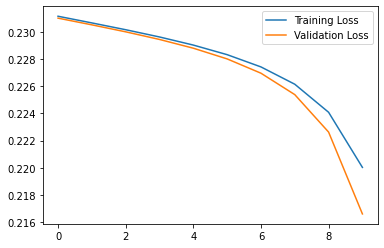

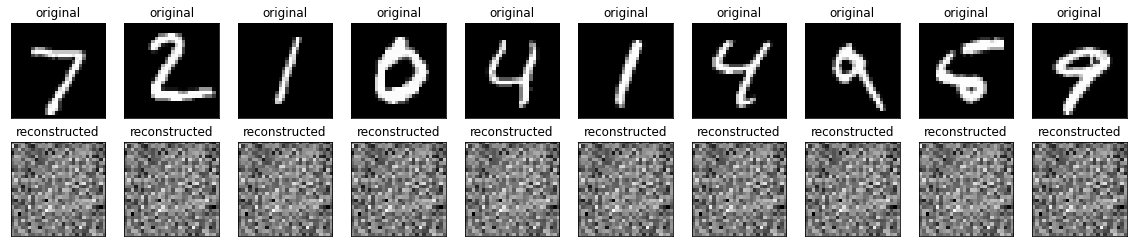

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0374 - val_loss: 0.0274
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0242 - val_loss: 0.0228
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0209 - val_loss: 0.0198
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0192 - val_loss: 0.0178
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0180 - val_loss: 0.0178
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0171 - val_loss: 0.0169
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0164 - val_loss: 0.0158
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0158 - val_loss: 0.0159
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0153 - val_loss: 0.0148
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - lo

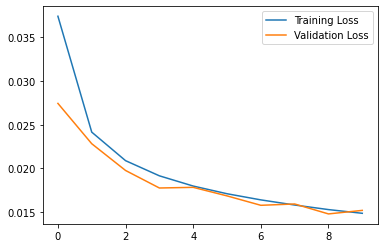

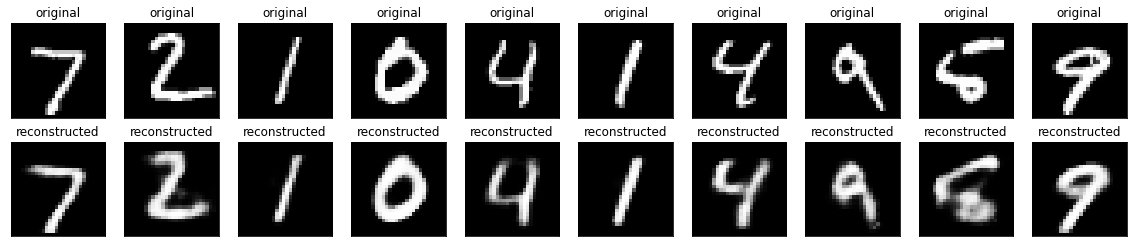

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2312 - val_loss: 0.2311
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2309 - val_loss: 0.2308
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2306 - val_loss: 0.2305
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2303 - val_loss: 0.2302
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2300 - val_loss: 0.2299
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2296 - val_loss: 0.2296
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2293 - val_loss: 0.2293
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2290 - val_loss: 0.2290
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2287 - val_loss: 0.2287
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.22

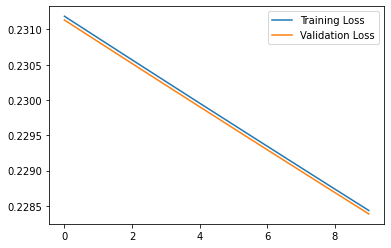

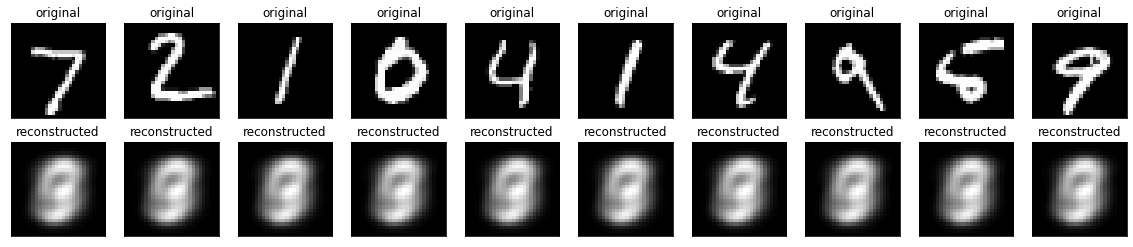

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0372 - val_loss: 0.0259
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0229 - val_loss: 0.0196
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0183 - val_loss: 0.0162
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0160 - val_loss: 0.0149
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0146 - val_loss: 0.0140
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0137 - val_loss: 0.0131
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0130 - val_loss: 0.0123
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0123 - val_loss: 0.0118
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0117 - val_loss: 0.0112
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

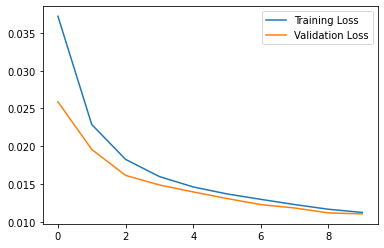

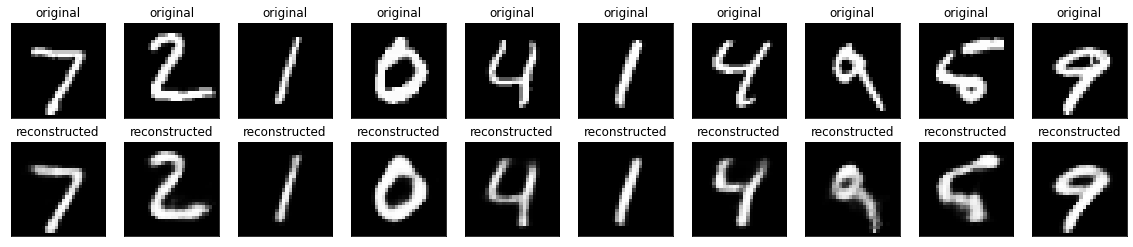

In [10]:
Optimizers = ['Adadelta','Adagrad','RMSprop','Ftrl','Nadam']
latent_dim = 32

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(latent_dim, activation='relu')
    ])
    self.decoder = tf.keras.Sequential([   
      layers.Dense(32, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),                               
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

for Optimizer in Optimizers:

    autoencoder = Autoencoder(latent_dim) 
    autoencoder.compile(optimizer=Optimizer, loss=losses.MeanSquaredError())
    start_time = time.time()
    history= autoencoder.fit(x_train, x_train,epochs=10,shuffle=True, validation_data=(x_test, x_test))
    end_time = time.time()  
    print ("Training time = " +str(end_time - start_time) )
    encoded_imgs = autoencoder.encoder(x_test).numpy()
    decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
    print(f'When the Optimizer is:{Optimizer}\n')
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.legend()
    print(f'When the Optimizer is:{Optimizer}\n')
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
         # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i])
        plt.title("original")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

  # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i])
        plt.title("reconstructed")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()


## Optimal Model of Fully Connected Autoencoder 



In [23]:
latent_dim =64

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(latent_dim, activation='relu')
    ])
    self.decoder = tf.keras.Sequential([   
      layers.Dense(32, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),                               
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder = Autoencoder(latent_dim) 

In [24]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [25]:
start_time = time.time()
history= autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))
end_time = time.time()  
print ("Training time = " +str(end_time - start_time) )

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0360 - val_loss: 0.0228
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0208 - val_loss: 0.0191
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0177 - val_loss: 0.0162
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0160 - val_loss: 0.0149
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0149 - val_loss: 0.0141
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0141 - val_loss: 0.0133
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0133 - val_loss: 0.0124
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0127 - val_loss: 0.0124
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0123 - val_loss: 0.0120
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.011

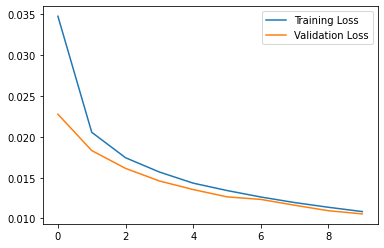

In [17]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [86]:
autoencoder.decoder.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_38 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_39 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_40 (Dense)             (None, 784)               101136    
_________________________________________________________________
reshape_6 (Reshape)          (None, 28, 28)            0         
Total params: 112,112
Trainable params: 112,112
Non-trainable params: 0
_________________________________________________________________


In [18]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

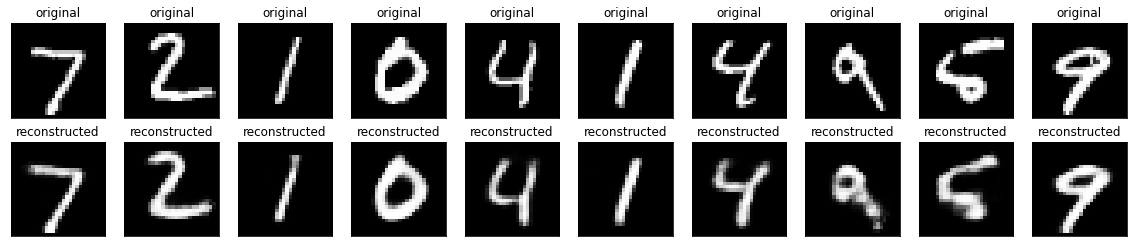

In [19]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## Load the dataset and pre-processing

In [22]:
(x_train, _), (x_test, _) =  mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]
print(x_train.shape)

(60000, 28, 28, 1)


## Convolutional Autoencoder (CAE)
Check for optimal number of filters for the bottleneck layer

Epoch 1/10
1875/1875 [==============================] - 383s 204ms/step - loss: 0.0150 - val_loss: 0.0072
Epoch 2/10
1875/1875 [==============================] - 384s 205ms/step - loss: 0.0067 - val_loss: 0.0060
Epoch 3/10
1875/1875 [==============================] - 382s 204ms/step - loss: 0.0060 - val_loss: 0.0056
Epoch 4/10
1875/1875 [==============================] - 382s 204ms/step - loss: 0.0056 - val_loss: 0.0053
Epoch 5/10
1875/1875 [==============================] - 385s 206ms/step - loss: 0.0054 - val_loss: 0.0051
Epoch 6/10
1875/1875 [==============================] - 386s 206ms/step - loss: 0.0052 - val_loss: 0.0049
Epoch 7/10
1875/1875 [==============================] - 381s 203ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 8/10
1875/1875 [==============================] - 384s 205ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 9/10
1875/1875 [==============================] - 383s 204ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 10/10
1875/1875 [=======================

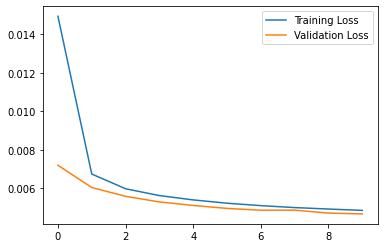

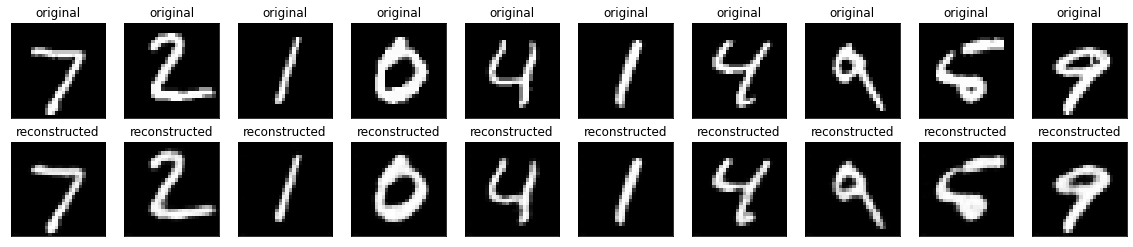

Epoch 1/10
1875/1875 [==============================] - 397s 212ms/step - loss: 0.0117 - val_loss: 0.0035
Epoch 2/10
1875/1875 [==============================] - 395s 211ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 3/10
1875/1875 [==============================] - 389s 208ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 4/10
1875/1875 [==============================] - 388s 207ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 5/10
1875/1875 [==============================] - 389s 207ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 6/10
1875/1875 [==============================] - 389s 207ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 7/10
1875/1875 [==============================] - 387s 206ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 8/10
1875/1875 [==============================] - 387s 206ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 9/10
1875/1875 [==============================] - 387s 207ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 10/10
1875/1875 [=======================

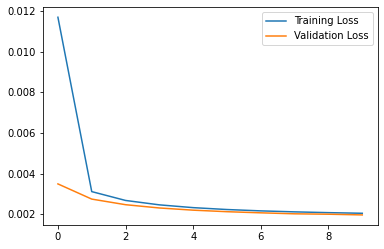

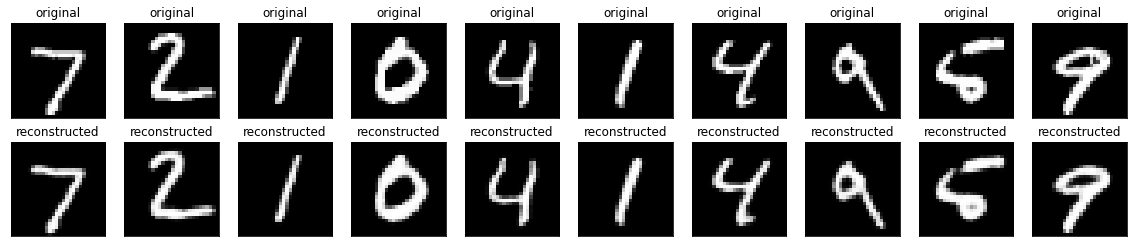

Epoch 1/10
1875/1875 [==============================] - 399s 213ms/step - loss: 0.0081 - val_loss: 0.0017
Epoch 2/10
1875/1875 [==============================] - 397s 212ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 3/10
1875/1875 [==============================] - 394s 210ms/step - loss: 0.0011 - val_loss: 9.9005e-04
Epoch 4/10
1875/1875 [==============================] - 397s 212ms/step - loss: 9.5221e-04 - val_loss: 8.6582e-04
Epoch 5/10
1875/1875 [==============================] - 400s 213ms/step - loss: 8.5719e-04 - val_loss: 7.9928e-04
Epoch 6/10
1875/1875 [==============================] - 397s 212ms/step - loss: 7.9593e-04 - val_loss: 7.4927e-04
Epoch 7/10
1875/1875 [==============================] - 398s 212ms/step - loss: 7.5301e-04 - val_loss: 7.3050e-04
Epoch 8/10
1875/1875 [==============================] - 396s 211ms/step - loss: 7.2115e-04 - val_loss: 6.9505e-04
Epoch 9/10
1875/1875 [==============================] - 395s 211ms/step - loss: 6.9510e-04 - val_loss: 6.507

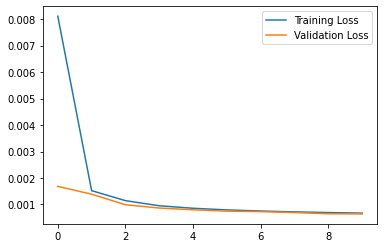

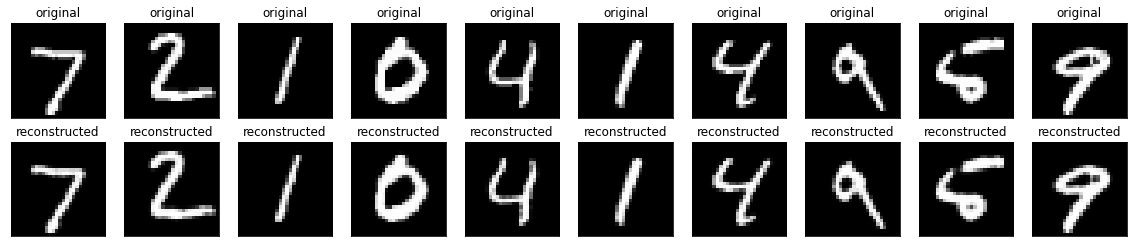

Epoch 1/10
1875/1875 [==============================] - 458s 244ms/step - loss: 0.0063 - val_loss: 0.0013
Epoch 2/10
1875/1875 [==============================] - 449s 239ms/step - loss: 0.0011 - val_loss: 8.4302e-04
Epoch 3/10
1875/1875 [==============================] - 450s 240ms/step - loss: 7.7938e-04 - val_loss: 6.9492e-04
Epoch 4/10
1875/1875 [==============================] - 443s 236ms/step - loss: 6.1993e-04 - val_loss: 5.2320e-04
Epoch 5/10
1875/1875 [==============================] - 434s 231ms/step - loss: 5.0691e-04 - val_loss: 4.5831e-04
Epoch 6/10
1875/1875 [==============================] - 426s 227ms/step - loss: 4.5432e-04 - val_loss: 4.1645e-04
Epoch 7/10
1875/1875 [==============================] - 416s 222ms/step - loss: 4.1574e-04 - val_loss: 3.9180e-04
Epoch 8/10
1875/1875 [==============================] - 409s 218ms/step - loss: 3.8404e-04 - val_loss: 3.5407e-04
Epoch 9/10
1875/1875 [==============================] - 409s 218ms/step - loss: 3.5848e-04 - val_los

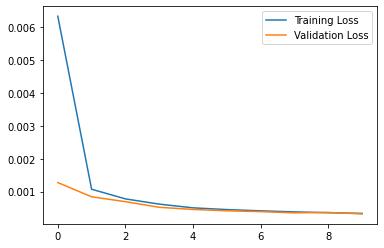

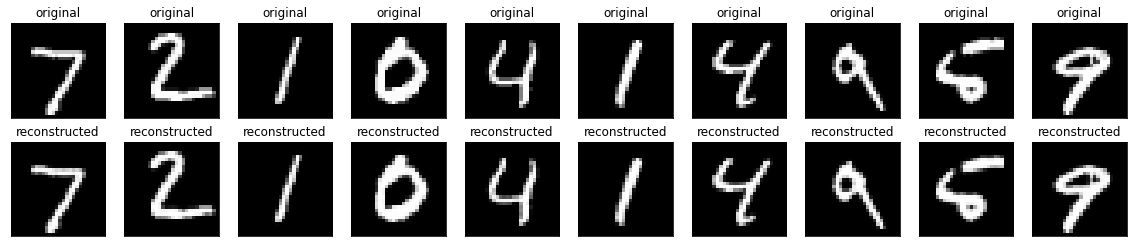

Epoch 1/10
1875/1875 [==============================] - 422s 225ms/step - loss: 0.0055 - val_loss: 9.3531e-04
Epoch 2/10
1875/1875 [==============================] - 428s 228ms/step - loss: 7.4458e-04 - val_loss: 5.9800e-04
Epoch 3/10
1875/1875 [==============================] - 436s 233ms/step - loss: 5.4579e-04 - val_loss: 4.8204e-04
Epoch 4/10
1875/1875 [==============================] - 423s 225ms/step - loss: 4.4416e-04 - val_loss: 3.9668e-04
Epoch 5/10
1875/1875 [==============================] - 420s 224ms/step - loss: 3.2698e-04 - val_loss: 2.7765e-04
Epoch 6/10
1875/1875 [==============================] - 419s 223ms/step - loss: 2.3002e-04 - val_loss: 2.0297e-04
Epoch 7/10
1875/1875 [==============================] - 422s 225ms/step - loss: 1.9143e-04 - val_loss: 1.6870e-04
Epoch 8/10
1875/1875 [==============================] - 421s 225ms/step - loss: 1.6809e-04 - val_loss: 1.4928e-04
Epoch 9/10
1875/1875 [==============================] - 419s 223ms/step - loss: 1.5165e-04 -

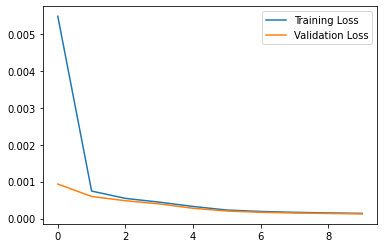

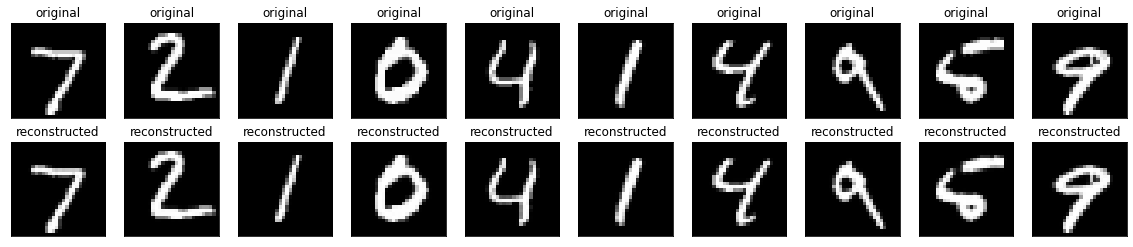

Epoch 1/10
1875/1875 [==============================] - 431s 230ms/step - loss: 0.0055 - val_loss: 8.4523e-04
Epoch 2/10
1875/1875 [==============================] - 426s 227ms/step - loss: 6.7874e-04 - val_loss: 5.4332e-04
Epoch 3/10
1875/1875 [==============================] - 426s 227ms/step - loss: 4.6827e-04 - val_loss: 3.6655e-04
Epoch 4/10
1875/1875 [==============================] - 433s 231ms/step - loss: 3.3115e-04 - val_loss: 2.7070e-04
Epoch 5/10
1875/1875 [==============================] - 435s 232ms/step - loss: 2.3035e-04 - val_loss: 2.0632e-04
Epoch 6/10
1875/1875 [==============================] - 438s 234ms/step - loss: 1.7022e-04 - val_loss: 1.4957e-04
Epoch 7/10
1875/1875 [==============================] - 433s 231ms/step - loss: 1.3983e-04 - val_loss: 1.2874e-04
Epoch 8/10
1875/1875 [==============================] - 438s 233ms/step - loss: 1.1432e-04 - val_loss: 9.3868e-05
Epoch 9/10
1875/1875 [==============================] - 434s 232ms/step - loss: 9.1210e-05 -

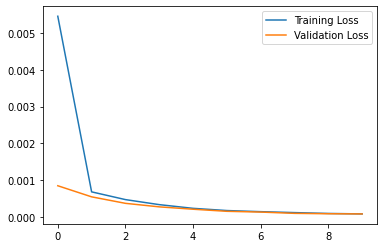

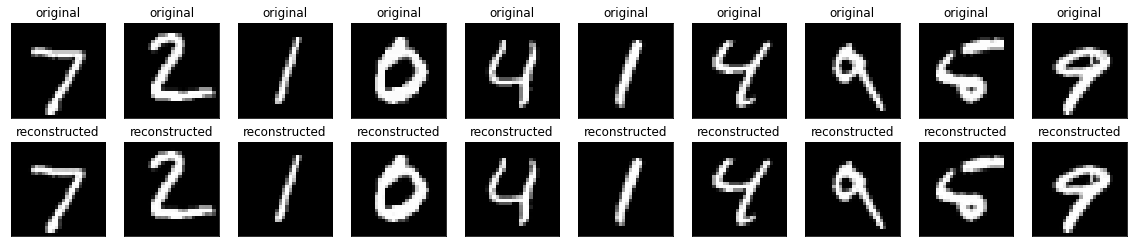

Epoch 1/10
1875/1875 [==============================] - 487s 260ms/step - loss: 0.0053 - val_loss: 5.9834e-04
Epoch 2/10
1875/1875 [==============================] - 472s 252ms/step - loss: 4.3262e-04 - val_loss: 3.2722e-04
Epoch 3/10
1875/1875 [==============================] - 463s 247ms/step - loss: 2.5433e-04 - val_loss: 1.9527e-04
Epoch 4/10
1875/1875 [==============================] - 461s 246ms/step - loss: 1.6920e-04 - val_loss: 1.3250e-04
Epoch 5/10
1875/1875 [==============================] - 460s 246ms/step - loss: 1.2158e-04 - val_loss: 1.0711e-04
Epoch 6/10
1875/1875 [==============================] - 454s 242ms/step - loss: 8.7631e-05 - val_loss: 1.0624e-04
Epoch 7/10
 859/1875 [============>.................] - ETA: 3:55 - loss: 6.7334e-05

In [ ]:
bottlenecks = [2,4,7,8,14,16,32]
#bottlenecks = [2]
for bottleneck in bottlenecks:
  class Convolutional(Model):
    def __init__(self):
      super(Convolutional, self).__init__()
      self.encoder = tf.keras.Sequential([
         layers.Input(shape=(28, 28, 1)),
         layers.Conv2D(128, (3,3), activation='relu', padding='same', strides=2), 
         #layers.Conv2D(64, (3,3), activation='relu', padding='same', strides=2),
         #layers.Conv2D(32, (3,3), activation='relu', padding='same', strides=2),
         layers.Conv2D(bottleneck, (3,3), activation='relu', padding='same', strides=2)])
    
      self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(bottleneck, kernel_size=3, strides=2, activation='relu', padding='same'),
          #layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
          #layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(128, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])
    
    def call(self, x):
      encoded = self.encoder(x)
      decoded = self.decoder(encoded)
      return decoded

  autoencoder = Convolutional()
  autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
  start_time = time.time()
  history=autoencoder.fit(x_train, x_train, epochs=10,shuffle=True,validation_data=(x_test, x_test))
  end_time = time.time()  
  print ("Training time = " +str(end_time - start_time) )
  print(f'When the bottleneck is:{bottleneck}\n')
  plt.plot(history.history["loss"], label="Training Loss")
  plt.plot(history.history["val_loss"], label="Validation Loss")
  plt.legend()
  encoded_imgs = autoencoder.encoder(x_test).numpy()
  decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
  n = 10
  print(f'When the bottleneck is:{bottleneck}\n')
  plt.figure(figsize=(20, 4))
  for i in range(n):

    # display original
      ax = plt.subplot(2, n, i + 1)
      plt.title("original")
      plt.imshow(tf.squeeze(x_test[i]))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      bx = plt.subplot(2, n, i + n + 1)
      plt.title("reconstructed")
      plt.imshow(tf.squeeze(decoded_imgs[i]))
      plt.gray()
      bx.get_xaxis().set_visible(False)
      bx.get_yaxis().set_visible(False)
  plt.show()

# Additional Testing
## Searching for the optimal architecture of the convolutional autoencoder (CAE)


Epoch 1/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0107 - val_loss: 0.0020
Epoch 2/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 3/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 4/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0011 - val_loss: 9.4773e-04
Epoch 5/10
1875/1875 [==============================] - 82s 44ms/step - loss: 9.2447e-04 - val_loss: 8.8069e-04
Epoch 6/10
1875/1875 [==============================] - 89s 47ms/step - loss: 8.1617e-04 - val_loss: 7.6269e-04
Epoch 7/10
1875/1875 [==============================] - 84s 45ms/step - loss: 7.5304e-04 - val_loss: 7.2147e-04
Epoch 8/10
1875/1875 [==============================] - 84s 45ms/step - loss: 7.2247e-04 - val_loss: 7.0401e-04
Epoch 9/10
1875/1875 [==============================] - 84s 45ms/step - loss: 7.0138e-04 - val_loss: 6.7768e-04
Epoch 10/10
1875/187

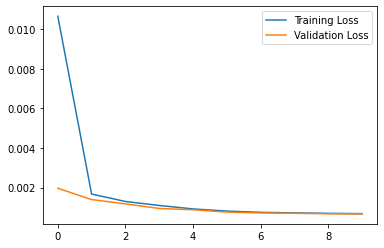

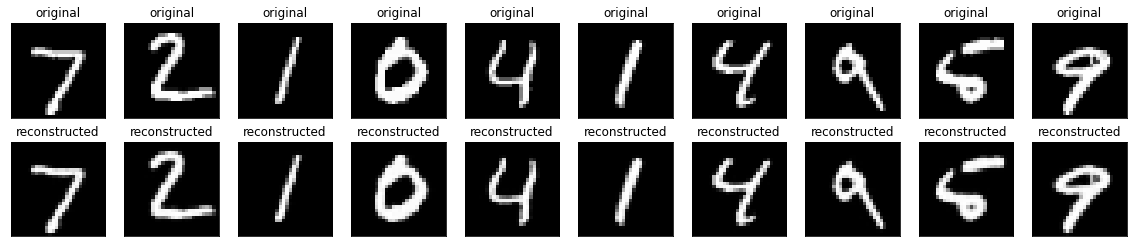

In [25]:
#Filters = [4, 8, 64, 128]
Filters = [3]
for Filter in Filters:
  class Convolutional(Model):
    def __init__(self):
      super(Convolutional, self).__init__()
      self.encoder = tf.keras.Sequential([
         layers.Input(shape=(28, 28, 1)), 
         layers.Conv2D(16, (Filter,Filter), activation='relu', padding='same', strides=2),
         layers.Conv2D(8, (Filter,Filter), activation='relu', padding='same', strides=2)])
    
      self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(8, kernel_size=Filter, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=Filter, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(Filter,Filter), activation='sigmoid', padding='same')])
    
    def call(self, x):
      encoded = self.encoder(x)
      decoded = self.decoder(encoded)
      return decoded

  autoencoder = Convolutional()
  autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
  start_time = time.time()
  history=autoencoder.fit(x_train, x_train, epochs=10,shuffle=True,validation_data=(x_test, x_test))
  end_time = time.time()  
  print ("Training time = " +str(end_time - start_time) )
  print(f'When the Filter is:{Filter}\n')
  plt.plot(history.history["loss"], label="Training Loss")
  plt.plot(history.history["val_loss"], label="Validation Loss")
  plt.legend()
  encoded_imgs = autoencoder.encoder(x_test).numpy()
  decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
  n = 10
  print(f'When the Filter is:{Filter}\n')
  plt.figure(figsize=(20, 4))
  for i in range(n):

    # display original
      ax = plt.subplot(2, n, i + 1)
      plt.title("original")
      plt.imshow(tf.squeeze(x_test[i]))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      bx = plt.subplot(2, n, i + n + 1)
      plt.title("reconstructed")
      plt.imshow(tf.squeeze(decoded_imgs[i]))
      plt.gray()
      bx.get_xaxis().set_visible(False)
      bx.get_yaxis().set_visible(False)
  plt.show()

Epoch 1/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0113 - val_loss: 0.0016
Epoch 2/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 3/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0011 - val_loss: 9.7713e-04
Epoch 4/10
1875/1875 [==============================] - 81s 43ms/step - loss: 9.4030e-04 - val_loss: 8.8449e-04
Epoch 5/10
1875/1875 [==============================] - 81s 43ms/step - loss: 8.5552e-04 - val_loss: 8.1877e-04
Epoch 6/10
1875/1875 [==============================] - 81s 43ms/step - loss: 8.0315e-04 - val_loss: 7.8984e-04
Epoch 7/10
1875/1875 [==============================] - 81s 43ms/step - loss: 7.2333e-04 - val_loss: 6.6323e-04
Epoch 8/10
1875/1875 [==============================] - 85s 45ms/step - loss: 6.5830e-04 - val_loss: 6.3119e-04
Epoch 9/10
1875/1875 [==============================] - 82s 44ms/step - loss: 6.3812e-04 - val_loss: 6.1860e-04
Epoch 10/10


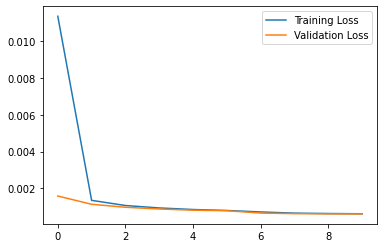

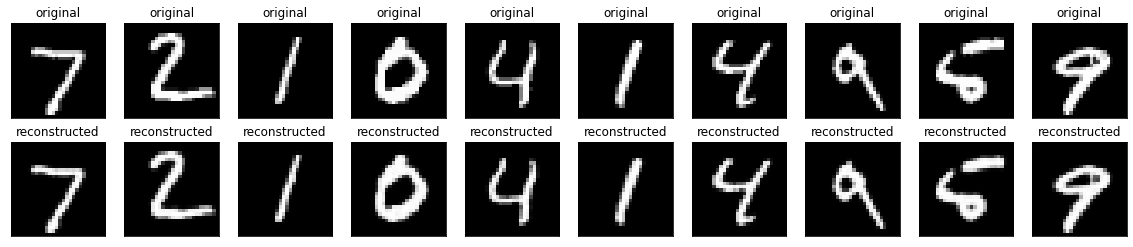

Epoch 1/10
1875/1875 [==============================] - 118s 63ms/step - loss: 0.0103 - val_loss: 0.0017
Epoch 2/10
1875/1875 [==============================] - 118s 63ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 3/10
1875/1875 [==============================] - 118s 63ms/step - loss: 0.0011 - val_loss: 9.2648e-04
Epoch 4/10
1875/1875 [==============================] - 122s 65ms/step - loss: 8.7479e-04 - val_loss: 8.0171e-04
Epoch 5/10
1875/1875 [==============================] - 118s 63ms/step - loss: 7.5933e-04 - val_loss: 7.0852e-04
Epoch 6/10
1875/1875 [==============================] - 119s 64ms/step - loss: 6.9048e-04 - val_loss: 6.5322e-04
Epoch 7/10
1875/1875 [==============================] - 119s 63ms/step - loss: 6.4422e-04 - val_loss: 6.0751e-04
Epoch 8/10
1875/1875 [==============================] - 118s 63ms/step - loss: 6.0888e-04 - val_loss: 5.8694e-04
Epoch 9/10
1875/1875 [==============================] - 122s 65ms/step - loss: 5.8103e-04 - val_loss: 5.5401e-04
Epo

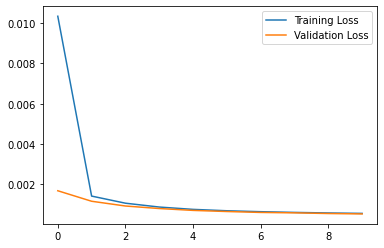

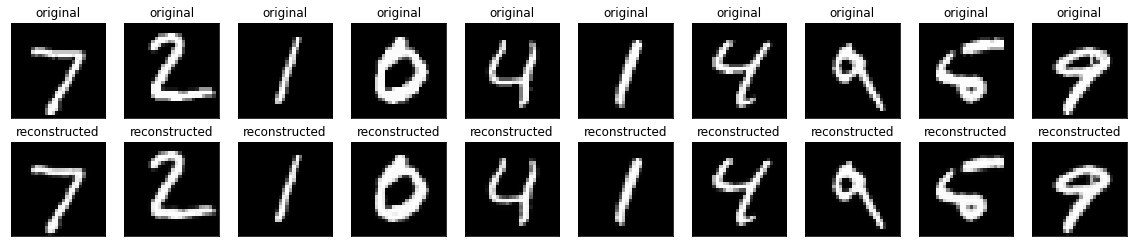

In [26]:
#Filters = [4, 8, 64, 128]
Filters = [3,4]
for Filter in Filters:
  class Convolutional(Model):
    def __init__(self):
      super(Convolutional, self).__init__()
      self.encoder = tf.keras.Sequential([
         layers.Input(shape=(28, 28, 1)), 
         layers.Conv2D(16, (Filter,Filter), activation='relu', padding='same', strides=2),
         layers.Conv2D(8, (Filter,Filter), activation='relu', padding='same', strides=2)])
    
      self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(Filter,Filter), activation='sigmoid', padding='same')])
    
    def call(self, x):
      encoded = self.encoder(x)
      decoded = self.decoder(encoded)
      return decoded

  autoencoder = Convolutional()
  autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
  start_time = time.time()
  history=autoencoder.fit(x_train, x_train, epochs=10,shuffle=True,validation_data=(x_test, x_test))
  end_time = time.time()  
  print ("Training time = " +str(end_time - start_time) )
  print(f'When the Filter is:{Filter}\n')
  plt.plot(history.history["loss"], label="Training Loss")
  plt.plot(history.history["val_loss"], label="Validation Loss")
  plt.legend()
  encoded_imgs = autoencoder.encoder(x_test).numpy()
  decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
  n = 10
  print(f'When the Filter is:{Filter}\n')
  plt.figure(figsize=(20, 4))
  for i in range(n):

    # display original
      ax = plt.subplot(2, n, i + 1)
      plt.title("original")
      plt.imshow(tf.squeeze(x_test[i]))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      bx = plt.subplot(2, n, i + n + 1)
      plt.title("reconstructed")
      plt.imshow(tf.squeeze(decoded_imgs[i]))
      plt.gray()
      bx.get_xaxis().set_visible(False)
      bx.get_yaxis().set_visible(False)
  plt.show()

Epoch 1/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0104 - val_loss: 0.0018
Epoch 2/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 3/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 4/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0010 - val_loss: 9.3590e-04
Epoch 5/10
1875/1875 [==============================] - 82s 44ms/step - loss: 8.7181e-04 - val_loss: 7.8793e-04
Epoch 6/10
1875/1875 [==============================] - 82s 44ms/step - loss: 7.8309e-04 - val_loss: 7.4778e-04
Epoch 7/10
1875/1875 [==============================] - 82s 44ms/step - loss: 7.4811e-04 - val_loss: 7.2914e-04
Epoch 8/10
1875/1875 [==============================] - 82s 44ms/step - loss: 7.2167e-04 - val_loss: 6.9740e-04
Epoch 9/10
1875/1875 [==============================] - 82s 44ms/step - loss: 6.9863e-04 - val_loss: 6.8646e-04
Epoch 10/10
1875/187

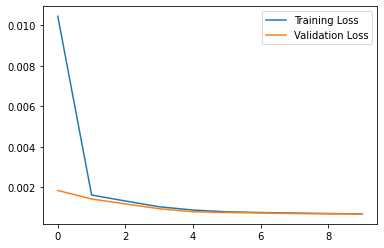

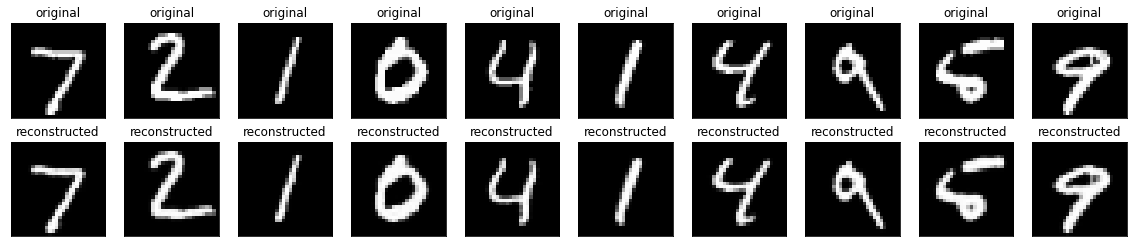

Epoch 1/10
1875/1875 [==============================] - 107s 57ms/step - loss: 0.1133 - val_loss: 0.1140
Epoch 2/10
1875/1875 [==============================] - 108s 58ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 3/10
1875/1875 [==============================] - 108s 58ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 4/10
1875/1875 [==============================] - 108s 58ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 5/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 6/10
1875/1875 [==============================] - 112s 60ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 7/10
1875/1875 [==============================] - 108s 58ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 8/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 9/10
1875/1875 [==============================] - 108s 58ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 10/10
1875/1875 [==============================] 

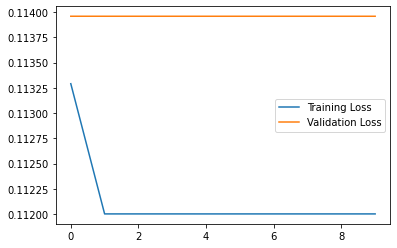

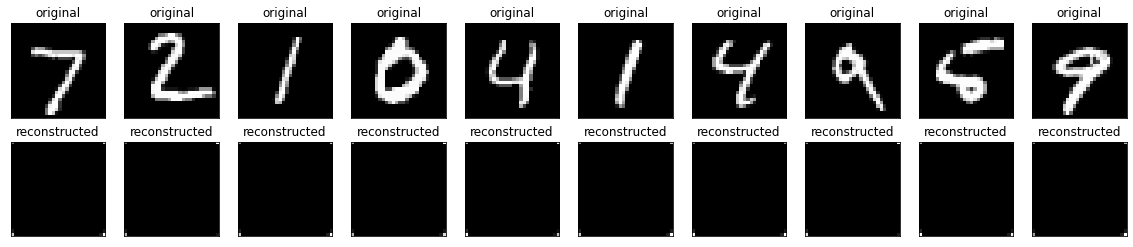

In [27]:
#Filters = [4, 8, 64, 128]
Filters = [3,4]
for Filter in Filters:
  class Convolutional(Model):
    def __init__(self):
      super(Convolutional, self).__init__()
      self.encoder = tf.keras.Sequential([
         layers.Input(shape=(28, 28, 1)), 
         layers.Conv2D(16, (Filter,Filter), activation='relu', padding='same', strides=2),
         layers.Conv2D(8, (Filter,Filter), activation='relu', padding='same', strides=2)])
    
      self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(8, kernel_size=(Filter,Filter), strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=(Filter,Filter), strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(Filter,Filter), activation='sigmoid', padding='same')])
    
    def call(self, x):
      encoded = self.encoder(x)
      decoded = self.decoder(encoded)
      return decoded

  autoencoder = Convolutional()
  autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
  start_time = time.time()
  history=autoencoder.fit(x_train, x_train, epochs=10,shuffle=True,validation_data=(x_test, x_test))
  end_time = time.time()  
  print ("Training time = " +str(end_time - start_time) )
  print(f'When the Filter is:{Filter}\n')
  plt.plot(history.history["loss"], label="Training Loss")
  plt.plot(history.history["val_loss"], label="Validation Loss")
  plt.legend()
  encoded_imgs = autoencoder.encoder(x_test).numpy()
  decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
  n = 10
  print(f'When the Filter is:{Filter}\n')
  plt.figure(figsize=(20, 4))
  for i in range(n):

    # display original
      ax = plt.subplot(2, n, i + 1)
      plt.title("original")
      plt.imshow(tf.squeeze(x_test[i]))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      bx = plt.subplot(2, n, i + n + 1)
      plt.title("reconstructed")
      plt.imshow(tf.squeeze(decoded_imgs[i]))
      plt.gray()
      bx.get_xaxis().set_visible(False)
      bx.get_yaxis().set_visible(False)
  plt.show()

Epoch 1/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0296 - val_loss: 0.0126
Epoch 2/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0092 - val_loss: 0.0076
Epoch 3/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0074 - val_loss: 0.0069
Epoch 4/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0070 - val_loss: 0.0066
Epoch 5/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0068 - val_loss: 0.0065
Epoch 6/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0066 - val_loss: 0.0063
Epoch 7/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0065 - val_loss: 0.0062
Epoch 8/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0064 - val_loss: 0.0062
Epoch 9/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0063 - val_loss: 0.0061
Epoch 10/10
1875/1875 [==============================] - 77s 41m

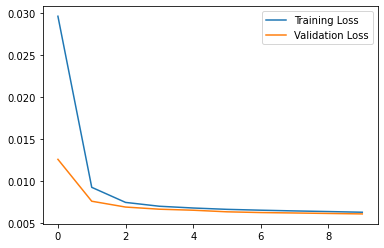

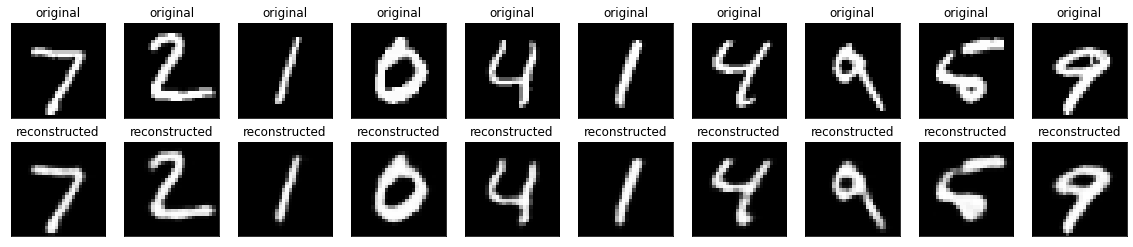

Epoch 1/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0174 - val_loss: 0.0035
Epoch 2/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0029 - val_loss: 0.0025
Epoch 3/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 4/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 5/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 6/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 7/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 8/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 9/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 10/10
1875/1875 [==============================] - 78s 42m

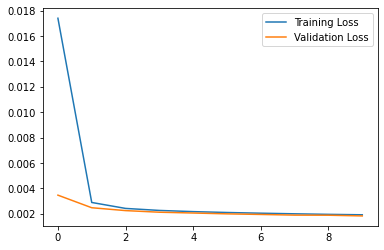

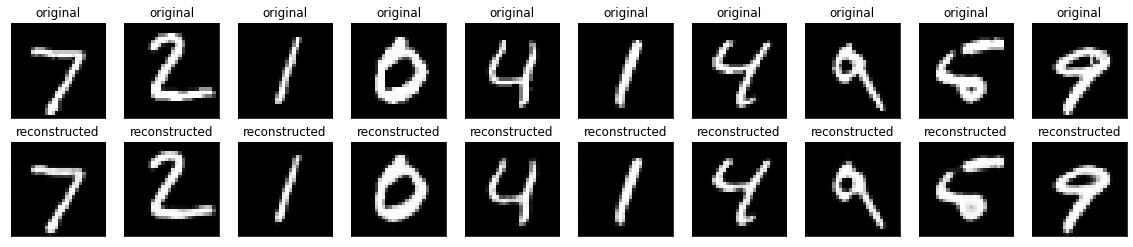

Epoch 1/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0075 - val_loss: 8.9788e-04
Epoch 2/10
1875/1875 [==============================] - 89s 48ms/step - loss: 7.2324e-04 - val_loss: 5.8595e-04
Epoch 3/10
1875/1875 [==============================] - 89s 47ms/step - loss: 5.0142e-04 - val_loss: 4.4323e-04
Epoch 4/10
1875/1875 [==============================] - 89s 47ms/step - loss: 3.8687e-04 - val_loss: 3.4089e-04
Epoch 5/10
1875/1875 [==============================] - 89s 47ms/step - loss: 3.2134e-04 - val_loss: 2.8930e-04
Epoch 6/10
1875/1875 [==============================] - 89s 47ms/step - loss: 2.7738e-04 - val_loss: 2.6081e-04
Epoch 7/10
1875/1875 [==============================] - 87s 47ms/step - loss: 2.4432e-04 - val_loss: 2.3007e-04
Epoch 8/10
1875/1875 [==============================] - 91s 49ms/step - loss: 2.2175e-04 - val_loss: 2.1681e-04
Epoch 9/10
1875/1875 [==============================] - 88s 47ms/step - loss: 2.0516e-04 - val_loss: 1.9593e

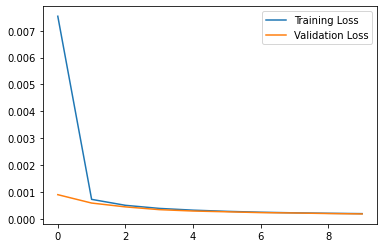

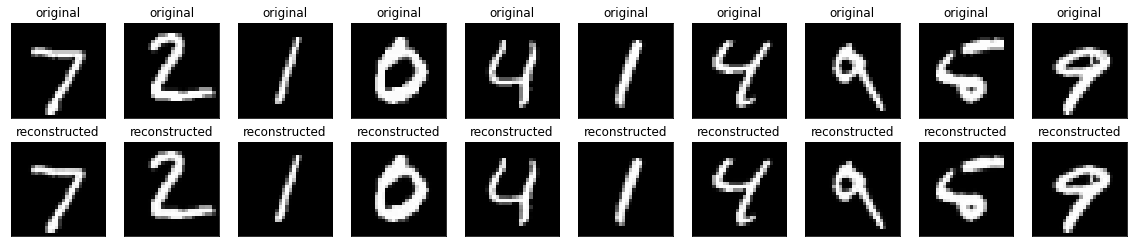

Epoch 1/10
1875/1875 [==============================] - 118s 63ms/step - loss: 0.0050 - val_loss: 6.2033e-04
Epoch 2/10
1875/1875 [==============================] - 118s 63ms/step - loss: 4.6841e-04 - val_loss: 3.5007e-04
Epoch 3/10
1875/1875 [==============================] - 118s 63ms/step - loss: 2.8846e-04 - val_loss: 2.3463e-04
Epoch 4/10
1875/1875 [==============================] - 121s 64ms/step - loss: 2.2123e-04 - val_loss: 1.9830e-04
Epoch 5/10
1875/1875 [==============================] - 117s 63ms/step - loss: 1.8775e-04 - val_loss: 1.7305e-04
Epoch 6/10
1875/1875 [==============================] - 118s 63ms/step - loss: 1.6582e-04 - val_loss: 1.5180e-04
Epoch 7/10
1875/1875 [==============================] - 118s 63ms/step - loss: 1.5033e-04 - val_loss: 1.3624e-04
Epoch 8/10
1875/1875 [==============================] - 118s 63ms/step - loss: 1.3809e-04 - val_loss: 1.3483e-04
Epoch 9/10
1875/1875 [==============================] - 122s 65ms/step - loss: 1.2768e-04 - val_loss

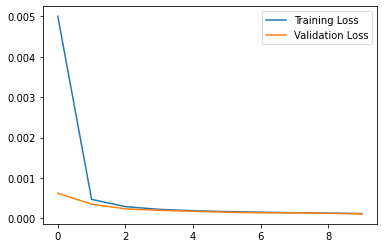

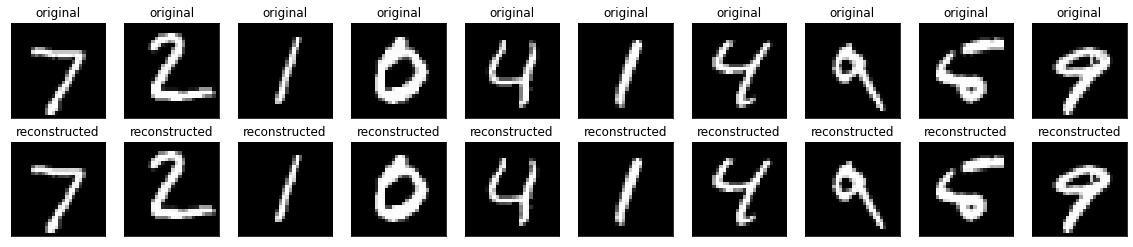

Epoch 1/10
1875/1875 [==============================] - 192s 102ms/step - loss: 0.0039 - val_loss: 4.6676e-04
Epoch 2/10
1875/1875 [==============================] - 194s 103ms/step - loss: 3.4681e-04 - val_loss: 2.6175e-04
Epoch 3/10
1875/1875 [==============================] - 196s 105ms/step - loss: 2.2631e-04 - val_loss: 1.9723e-04
Epoch 4/10
1875/1875 [==============================] - 192s 102ms/step - loss: 1.7310e-04 - val_loss: 1.5084e-04
Epoch 5/10
1875/1875 [==============================] - 192s 102ms/step - loss: 1.4165e-04 - val_loss: 1.2082e-04
Epoch 6/10
1875/1875 [==============================] - 196s 104ms/step - loss: 1.1448e-04 - val_loss: 9.7877e-05
Epoch 7/10
1875/1875 [==============================] - 193s 103ms/step - loss: 8.8678e-05 - val_loss: 6.9156e-05
Epoch 8/10
1875/1875 [==============================] - 194s 104ms/step - loss: 6.6754e-05 - val_loss: 6.0244e-05
Epoch 9/10
1875/1875 [==============================] - 195s 104ms/step - loss: 5.0789e-05 -

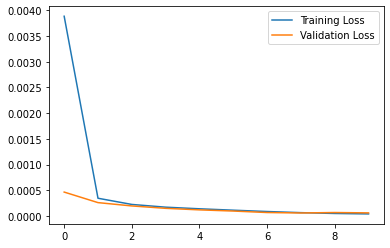

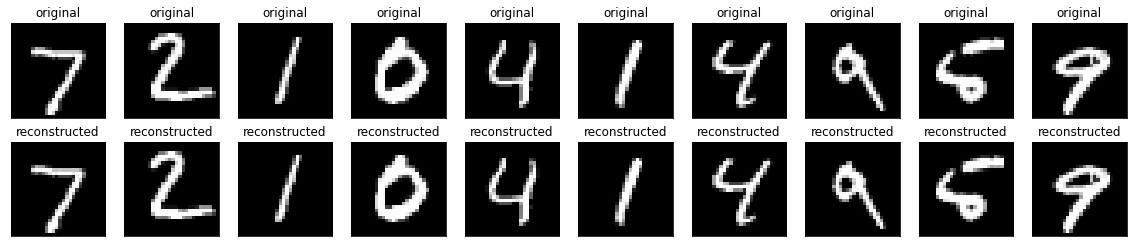

In [28]:
bottlenecks = [2,4,32, 64,128]
for bottleneck in bottlenecks:
  class Convolutional(Model):
    def __init__(self):
      super(Convolutional, self).__init__()
      self.encoder = tf.keras.Sequential([
         layers.Input(shape=(28, 28, 1)), 
         layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
         layers.Conv2D(bottleneck, (3,3), activation='relu', padding='same', strides=2)])
    
      self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(bottleneck, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])
    
    def call(self, x):
      encoded = self.encoder(x)
      decoded = self.decoder(encoded)
      return decoded

  autoencoder = Convolutional()
  autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
  start_time = time.time()
  history=autoencoder.fit(x_train, x_train, epochs=10,shuffle=True,validation_data=(x_test, x_test))
  end_time = time.time()  
  print ("Training time = " +str(end_time - start_time) )
  print(f'When the bottleneck is:{bottleneck}\n')
  plt.plot(history.history["loss"], label="Training Loss")
  plt.plot(history.history["val_loss"], label="Validation Loss")
  plt.legend()
  encoded_imgs = autoencoder.encoder(x_test).numpy()
  decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
  n = 10
  print(f'When the bottleneck is:{bottleneck}\n')
  plt.figure(figsize=(20, 4))
  for i in range(n):

    # display original
      ax = plt.subplot(2, n, i + 1)
      plt.title("original")
      plt.imshow(tf.squeeze(x_test[i]))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      bx = plt.subplot(2, n, i + n + 1)
      plt.title("reconstructed")
      plt.imshow(tf.squeeze(decoded_imgs[i]))
      plt.gray()
      bx.get_xaxis().set_visible(False)
      bx.get_yaxis().set_visible(False)
  plt.show()

1875/1875 [==============================] - 70s 37ms/step - loss: 0.0187 - val_loss: 0.0083
Training time = 70.59566879272461
When the bottleneck is:2

When the bottleneck is:2



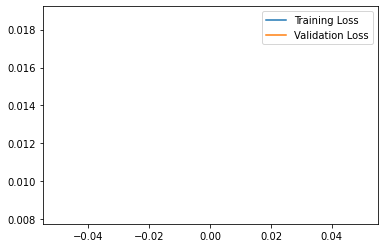

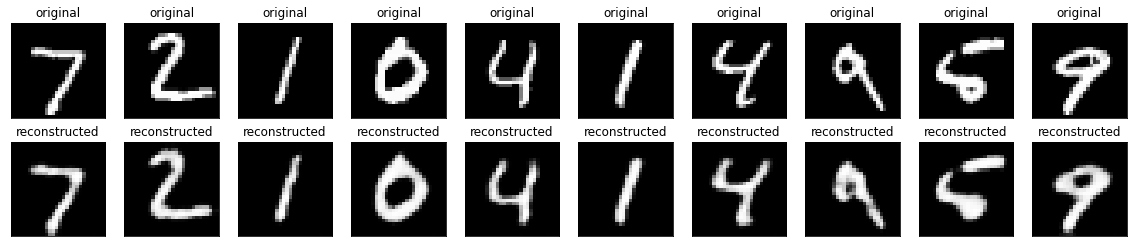

1875/1875 [==============================] - 68s 37ms/step - loss: 0.0158 - val_loss: 0.0026
Training time = 68.95492696762085
When the bottleneck is:4

When the bottleneck is:4



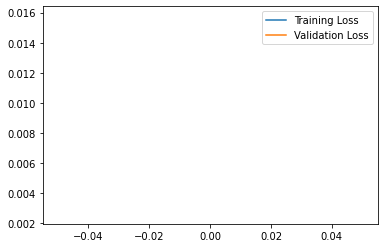

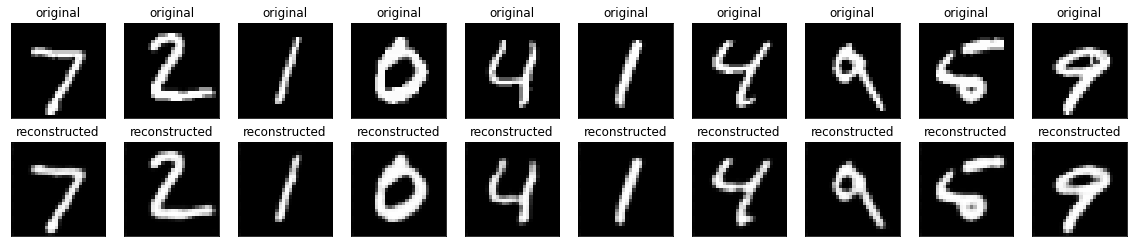

1875/1875 [==============================] - 68s 36ms/step - loss: 0.0108 - val_loss: 0.0017
Training time = 68.39814448356628
When the bottleneck is:7

When the bottleneck is:7



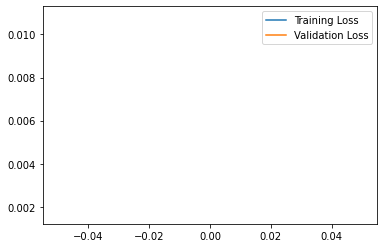

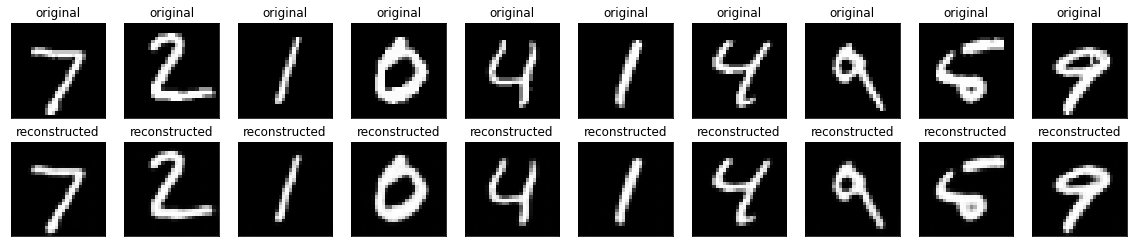

1875/1875 [==============================] - 67s 36ms/step - loss: 0.0118 - val_loss: 0.0016
Training time = 67.55855774879456
When the bottleneck is:8

When the bottleneck is:8



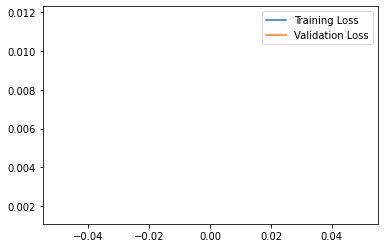

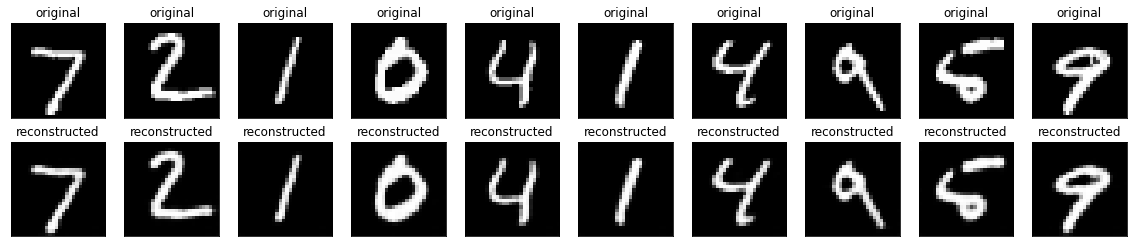

1875/1875 [==============================] - 71s 38ms/step - loss: 0.0088 - val_loss: 0.0011
Training time = 71.22038102149963
When the bottleneck is:14

When the bottleneck is:14



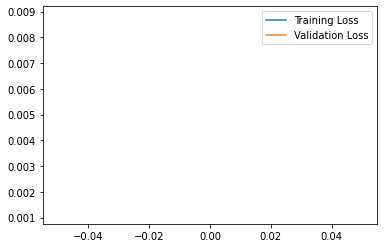

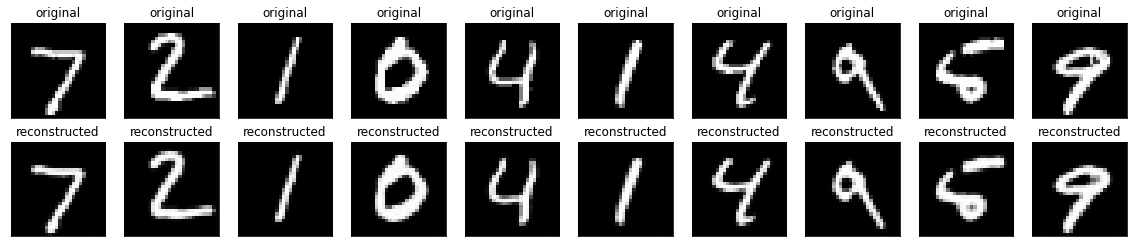

1875/1875 [==============================] - 72s 38ms/step - loss: 0.0078 - val_loss: 0.0012
Training time = 72.45366191864014
When the bottleneck is:16

When the bottleneck is:16



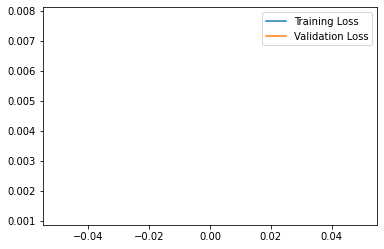

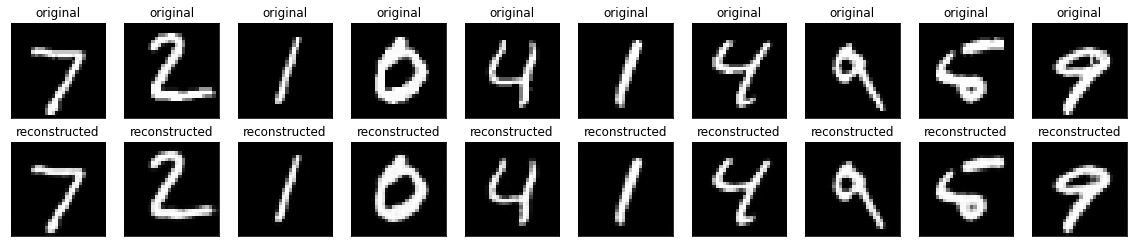

In [11]:
bottlenecks = [2,4,7,8,14,16]
for bottleneck in bottlenecks:
  class Convolutional(Model):
    def __init__(self):
      super(Convolutional, self).__init__()
      self.encoder = tf.keras.Sequential([
         layers.Input(shape=(28, 28, 1)), 
         layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
         layers.Conv2D(bottleneck, (3,3), activation='relu', padding='same', strides=2)])
    
      self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(bottleneck, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])
    
    def call(self, x):
      encoded = self.encoder(x)
      decoded = self.decoder(encoded)
      return decoded

  autoencoder = Convolutional()
  autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
  start_time = time.time()
  history=autoencoder.fit(x_train, x_train, epochs=1,shuffle=True,validation_data=(x_test, x_test))
  end_time = time.time()  
  print ("Training time = " +str(end_time - start_time) )
  print(f'When the bottleneck is:{bottleneck}\n')
  plt.plot(history.history["loss"], label="Training Loss")
  plt.plot(history.history["val_loss"], label="Validation Loss")
  plt.legend()
  encoded_imgs = autoencoder.encoder(x_test).numpy()
  decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
  n = 10
  print(f'When the bottleneck is:{bottleneck}\n')
  plt.figure(figsize=(20, 4))
  for i in range(n):

    # display original
      ax = plt.subplot(2, n, i + 1)
      plt.title("original")
      plt.imshow(tf.squeeze(x_test[i]))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      bx = plt.subplot(2, n, i + n + 1)
      plt.title("reconstructed")
      plt.imshow(tf.squeeze(decoded_imgs[i]))
      plt.gray()
      bx.get_xaxis().set_visible(False)
      bx.get_yaxis().set_visible(False)
  plt.show()